## 2.2 Primer: zimske olimpijske igre, Soči 2014

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import Orange
from Orange.data.filter import SameValue
from Orange.data import Table
data = Table('podatki/athletes.tab')

# barve medalj
gold_color = "#FFDF00"
silv_color = "#C0C0C0"
bron_color = "#CD7F32"

sports = data.domain["sport"].values

##### Odgovor 2-2-1

##### Odgovor 2-2-2

##### Odgovor 2-2-3

##### Odgovor 2-2-3

##### Odgovor 2-2-4

##### Odgovor 2-2-5

##### Odgovor 2-2-6

##### Odgovor 2-2-7

Najprej izračunamo distribucijo vrednosti.

In [2]:
# poišči indekse
gold_inx = data.domain.index("gold_medals")
silv_inx = data.domain.index("silver_medals")
bron_inx = data.domain.index("bronze_medals")

# pripravi podatke ; shrani št. medalj za vsako državo in šport
countries = data.domain["country"].values


# preštej medalje
medals_by_country = dict()
for country in countries:
    medals_by_country[country] = dict()
    filt        = SameValue(data.domain["country"], country)
    data_subset = filt(data) 
    medals_by_country[country] = {
        "gold":   data_subset.X[:, gold_inx].sum(),
        "silver": data_subset.X[:, silv_inx].sum(),
        "bronze": data_subset.X[:, bron_inx].sum(),
}                    

Nato distribucijo narišemo.

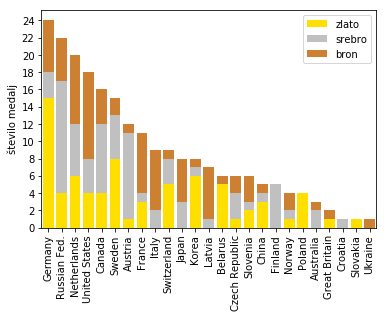

In [3]:
import numpy

countries = filter(lambda c: sum([medals_by_country[c][m] for m in medals_by_country[c].keys()]), countries)
countries = sorted(countries, key=lambda c: -sum([medals_by_country[c][m] for m in medals_by_country[c].keys()]))
gx = numpy.array([medals_by_country[c]["gold"] for c in countries])
sx = numpy.array([medals_by_country[c]["silver"] for c in countries])
bx = numpy.array([medals_by_country[c]["bronze"] for c in countries])
x = range(len(countries))

plt.bar(x, gx, align="center", color=gold_color, label="zlato")
plt.bar(x, sx, align="center", bottom=gx, color=silv_color, label="srebro")
plt.bar(x, bx, align="center", bottom=gx+sx, color=bron_color, label="bron")
plt.xlim(-0.5, len(x)-0.5)
plt.legend()
plt.xticks(x)
plt.yticks(range(0, 25, 2))
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel("število medalj")
plt.savefig('slike/odgovori/2-2-7.png', bbox_inches='tight')

##### Odgovor 2-2-8

In [4]:
# priprava podatkov
# teža in višina glede na sport; sport se nahaja v 8 stolpcu
sports = data.domain["sport"].values
weights_by_sport = dict()
heights_by_sport = dict()
ages_by_sport = dict()

for sport in sports:
    filt = SameValue(data.domain["sport"], sport)
    data_subset = filt(data)
    
    w = data_subset[:, data.domain.index("weight")].X.ravel()
    h = data_subset[:, data.domain.index("height")].X.ravel()
    a = data_subset[:, data.domain.index("age")].X.ravel()
    
    weights_by_sport[sport] = w
    heights_by_sport[sport] = h
    ages_by_sport[sport]    = a

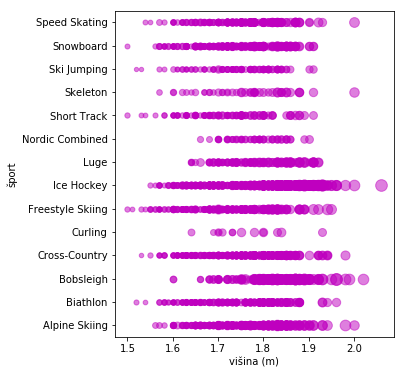

In [5]:
# napiši kodo za izris slike

plt.figure(figsize=(5, 6))

for si, sport in enumerate(sports):
    xs = heights_by_sport[sport]    # x os
    ys = [si for x in xs]           # y os je v visini sporta
    zs = weights_by_sport[sport]    # velikost točke je premosorazmerna s tezo
    
    for x, y, z in zip(xs, ys, zs): # rišemo točko po točko
        plt.plot(x, y, "m.", alpha=0.5, markersize=z/5)
            
plt.yticks(range(len(sports)))
plt.ylim(-0.5, len(sports)-0.5)
plt.gca().set_yticklabels(sports)
        
plt.xlabel("višina (m)")
plt.ylabel("šport");
plt.savefig('slike/odgovori/2-2-8.png', bbox_inches='tight')

##### Odgovor 2-2-9

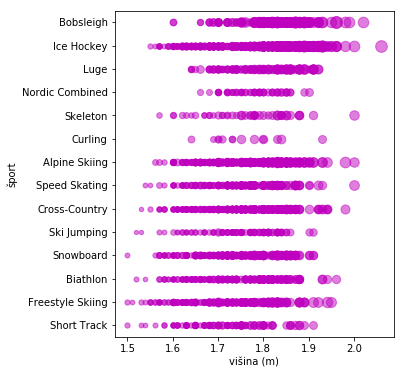

In [6]:
# napiši kodo za izris slike

plt.figure(figsize=(5, 6))

sport_order = []
for si, sport in enumerate(sports):
    xs = heights_by_sport[sport]    # x os
    sport_order.append((numpy.average(xs), si))
sport_order.sort()

sport_label = []
for nsi, (avg_xs, si) in enumerate(sport_order):
    sport = sports[si]
    sport_label.append(sport)
    
    xs = heights_by_sport[sport]    # x os
    ys = [nsi for x in xs]          # y os je v visini sporta
    zs = weights_by_sport[sport]    # velikost točke je premosorazmerna s tezo
    
    for x, y, z in zip(xs, ys, zs): # rišemo točko po točko
        plt.plot(x, y, "m.", alpha=0.5, markersize=z/5)
        
    plt.plot(avg_xs, nsi, 'k', markersize=1)
            
plt.yticks(range(len(sports)))
plt.ylim(-0.5, len(sports)-0.5)
plt.gca().set_yticklabels(sport_label)
        
plt.xlabel("višina (m)")
plt.ylabel("šport");